# **Aprendizaje supervisado**
# NB01. Preparación de Datos para Machine Learning

La limpieza y preparación de datos es un primer paso fundamental en cualquier proyecto de aprendizaje automático. Aunque a menudo pensamos que los científicos de datos pasan mucho tiempo jugando con algoritmos y modelos de aprendizaje automático, la realidad es que la mayoría de los científicos de datos pasan la mayor parte de su tiempo limpiando datos.


## <font color='blue'>**Entendiendo los datos**</font>

Antes de comenzar a limpiar datos para un proyecto de aprendizaje automático, es vital comprender qué son los datos y qué queremos lograr. Sin ese entendimiento, no tenemos una base desde la cual tomar decisiones sobre qué datos son relevantes mientras limpiamos y preparamos nuestros datos.

Trabajaremos con algunos datos de Lending Club, un mercado de préstamos personales que relaciona a prestatarios que buscan un préstamo con inversores que buscan prestar dinero y obtener una rentabilidad. Cada prestatario llena una solicitud completa, proporcionando su historial financiero anterior, el motivo del préstamo y más. Lending Club evalúa la calificación crediticia de cada prestatario utilizando datos históricos pasados ​​(¡y su propio proceso de ciencia de datos!) Y asigna una tasa de interés al prestatario.

Los préstamos aprobados se enumeran en el sitio web de Lending Club, donde los inversores calificados pueden consultar los préstamos aprobados recientemente, la calificación crediticia del prestatario, el propósito del préstamo y otra información de la solicitud.

Una vez que un inversor decide financiar un préstamo, el prestatario realiza los pagos mensuales a Lending Club. Lending Club redistribuye estos pagos a los inversores. Esto significa que los inversores no tienen que esperar hasta que se pague el monto total para comenzar a ver retornos. Si un préstamo se cancela en su totalidad a tiempo, los inversores obtienen un rendimiento que corresponde a la tasa de interés que el prestatario tuvo que pagar además de la cantidad solicitada.

Sin embargo, muchos préstamos no se cancelan completamente a tiempo y algunos prestatarios no pagan el préstamo. Ese es el problema que intentaremos abordar mientras limpiamos algunos datos de Lending Club para el aprendizaje automático. Imaginemos que se nos ha encomendado la tarea de crear un modelo para predecir si es probable que los prestatarios paguen o no paguen sus préstamos.

## <font color='blue'>**Paso 1: examinar el conjunto de datos**</font>

Lending Club publica periódicamente datos para todas sus solicitudes de préstamos aprobadas y rechazadas en su sitio web.

En el sitio de LendingClub, puede seleccionar diferentes rangos de años para descargar conjuntos de datos (en formato CSV) para préstamos aprobados y rechazados. También encontrará un diccionario de datos (en formato XLS) en la parte inferior de la página de LendingClub, que contiene información sobre los diferentes nombres de las columnas. Este diccionario de datos es útil para comprender qué representa cada columna en el conjunto de datos. El diccionario de datos contiene dos hojas:

    Hoja de LoanStats: describe el conjunto de datos de préstamos aprobados
    Hoja de RejectStats: describe el conjunto de datos de préstamos rechazados

Usaremos la hoja LoanStats ya que estamos interesados en el conjunto de datos de préstamos aprobados.

El conjunto de datos de préstamos aprobados contiene información sobre préstamos actuales, préstamos completados y préstamos en mora. En este tutorial, trabajaremos con datos de préstamos aprobados para los años 2007 a 2011, pero se requerirían pasos de limpieza similares para cualquiera de los datos publicados en el sitio de LendingClub.

Primero, importemos algunas de las librerias que usaremos y establezcamos algunos parámetros para que la salida sea más fácil de leer. Para los propósitos de este tutorial, asumiremos una comprensión sólida de los fundamentos del trabajo con datos en Python, incluido el uso de pandas, numpy, etc., por lo que si necesita repasar alguna de esas habilidades, es posible que desee volver a los notebooks de clases pasadas.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

### Cargando los datos en pandas

Hemos descargado nuestro conjunto de datos y lo hemos llamado lending_club_loans.csv, pero ahora necesitamos cargarlo en un DataFrame de pandas para explorarlo. Una vez que esté cargada, querremos hacer algunas tareas básicas de limpieza para eliminar cierta información que no necesitamos y que hará que nuestro procesamiento de datos sea más lento.

Específicamente, vamos a:

1. Eliminar la primera línea: contiene texto extraño en lugar de los títulos de las columnas. Este texto evita que la biblioteca de pandas analice correctamente el conjunto de datos.
    
2. Quitar la columna "desc": contiene una explicación de texto extensa para el préstamo que no necesitaremos.
    
3. Eliminar la columna "url": contiene un enlace a cada uno en Lending Club al que solo se puede acceder con una cuenta de inversor.
    
4. Eliminar todas las columnas con más del 50% de valores perdidos: esto nos permitirá trabajar más rápido (y nuestro conjunto de datos es lo suficientemente grande como para que aún tenga sentido sin ellos.

También nombraremos el conjunto de datos filtrados `loans_2007` y, al final de esta sección, lo guardaremos como `filtered_loans_2007.csv` para mantenerlo separado de los datos sin procesar. Esta es una buena práctica y garantiza que tengamos nuestros datos originales en caso de que necesitemos volver y recuperar cualquiera de los elementos que estamos eliminando.

Ahora, sigamos adelante y realicemos estos pasos:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# skip row 1 so pandas can parse the data properly.
loans_2007 = pd.read_csv('/content/drive/MyDrive/Magister/Ciencia de Datos/CienciadeDatos/data/lending_club_loans.csv', skiprows=1, low_memory=False)

print(loans_2007.columns)

half_count = len(loans_2007) / 2
print(half_count, loans_2007.shape)
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans_2007 = loans_2007.drop(['url','desc'],axis=1) # These columns are not useful for our purposes


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=115)
21269.0 (42538, 115)


Usemos el método pandas head () para mostrar las primeras tres filas del DataFrame de préstamos_2007, solo para asegurarnos de que pudimos cargar el conjunto de datos correctamente:

In [7]:
loans_2007.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


Utilicemos también el atributo pandas .shape para ver la cantidad de muestras y características con las que estamos tratando en esta etapa:

In [8]:
loans_2007.shape

(42538, 56)

## <font color='blue'>**Paso 2: Reducir nuestras columnas para la limpieza**</font>

Ahora que hemos configurado nuestros datos, deberíamos dedicar un tiempo a explorarlos y comprender qué función representa cada columna. Esto es importante, porque tener una comprensión deficiente de las características podría hacernos cometer errores en el análisis de datos y el proceso de modelado.

Usaremos el diccionario de datos que proporciona LendingClub para ayudarnos a familiarizarnos con las columnas y lo que cada una representa en el conjunto de datos. Para facilitar el proceso, crearemos un DataFrame para contener los nombres de las columnas, el tipo de datos, los valores de la primera fila y la descripción del diccionario de datos. Para facilitar esta tarea, hemos convertido previamente el diccionario de datos del formato Excel a un CSV.

Carguemos ese diccionario y echemos un vistazo.

In [12]:
data_dictionary = pd.read_csv('/content/drive/MyDrive/Magister/Ciencia de Datos/CienciadeDatos/data/LCDataDictionary.csv') # Loading in the data dictionary
print(data_dictionary.shape[0])

117


In [14]:
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})


Ahora que tenemos el diccionario de datos cargado, unamos la primera fila de `loans_2007` al DataFrame de `data_dictionary` para brindarnos un DataFrame de vista previa con las siguientes columnas:

    name: contiene los nombres de columna de loans_2007.
    dtypes: contiene los tipos de datos de las columnas loans_2007.
    first value: contiene los valores de la primera fila de loans_2007.
    description: explica lo que representa cada columna de loans_2007.

In [16]:
# Genera un DF solo con los tipos existentes en loans_2007
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes, columns=['dtypes'])
# Genera los indices del dataframe
loans_2007_dtypes = loans_2007_dtypes.reset_index()
# Define una nueva columna con los valores de index
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
# Define un dataframe solo con los valores de name y dtypes
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]
loans_2007_dtypes['first value'] = loans_2007.loc[0].values

preview = loans_2007_dtypes.merge(data_dictionary, on='name', how='left')

In [17]:
preview.head()

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000.0,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.


Cuando imprimimos la forma de `loans_2007` anteriormente, notamos que tenía 56 columnas, por lo que sabemos que este DataFrame de vista previa tiene 56 filas (una que explica cada columna en `loans_2007`).

Puede resultar engorroso tratar de explorar todas las filas de una vista previa a la vez, por lo que la dividiremos en tres partes y examinaremos una selección más pequeña de funciones cada vez. A medida que exploramos las funciones para comprender mejor cada una de ellas, queremos prestar atención a cualquier columna que:

* entrega información del futuro (después de que el préstamo ya haya sido financiado),
* no afecta la capacidad del prestatario para devolver el préstamo (por ejemplo, un valor de identificación generado aleatoriamente por Lending Club),
* tiene un formato deficiente,
* requiere más datos o mucho procesamiento previo para convertirse en una función útil, o
* contiene información redundante.

Estas son todas las cosas de las que querremos tener cuidado, ya que manejarlas incorrectamente dañará nuestro análisis a largo plazo.

Debemos prestar especial atención a la fuga de datos, que puede hacer que el modelo se sobreajuste. Esto se debe a que el modelo también aprendería de las funciones que no estarán disponibles cuando lo usemos para hacer predicciones sobre préstamos futuros. Necesitamos asegurarnos de que nuestro modelo esté entrenado utilizando solo los datos que tendría en el momento de la solicitud de un préstamo.

###__Primer grupo de columnas__

Vamos a mostrar las primeras 19 filas de la vista previa y analizarlas:

In [18]:
preview[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000.0,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


Después de analizar las columnas y considerar el modelo que estamos tratando de construir, podemos concluir que se pueden eliminar las siguientes características:

    id: campo generado aleatoriamente por LendingClub solo con fines de identificación única.
    member_id: campo también generado aleatoriamente por LendingClub solo con fines de identificación.
    fund_amnt: filtra información del futuro (después de que el préstamo ya se haya comenzado a financiar).
    found_amnt_inv: también filtra datos del futuro.
    sub_grade: contiene información redundante que ya se encuentra en la columna de calificación (más abajo).
    int_rate: también se incluye en la columna de calificación.
    emp_title: requiere otros datos y mucho procesamiento para ser potencialmente útil
    issue_d: filtra datos del futuro.

Nota: Lending Club utiliza la calificación del prestatario y el plazo de pago (30 o meses) para asignar una tasa de interés. Esto provoca variaciones en la tasa de interés dentro de un grado determinado.

Lo que puede resultar útil para nuestro modelo es centrarse en grupos de prestatarios en lugar de en individuos. Y eso es exactamente lo que hace la calificación: segmenta a los prestatarios en función de su puntaje crediticio y otros comportamientos, por lo que mantendremos la columna de calificación `grade` y eliminaremos el interés `int_rate` y `sub_grade`. Eliminemos estas columnas del DataFrame antes de pasar al siguiente grupo de columnas.

In [ ]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
'int_rate','sub_grade','emp_title','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)

Ahora estamos listos para pasar al siguiente grupo de columnas (funciones).

###__Segundo grupo de columnas__

Pasemos a las siguientes 19 columnas:

In [ ]:
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
23,delinq_2yrs,float64,0.0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported credit line was opened
25,fico_range_low,float64,735.0,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,float64,739.0,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,float64,1.0,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,float64,3.0,The number of open credit lines in the borrower's credit file.


En este grupo, tome nota de las columnas `fico_range_low` y `fico_range_high`. Si bien ambos se encuentran en la tabla anterior, hablaremos más sobre ellos después de ver el último grupo de columnas. También tenga en cuenta que si está trabajando con datos más recientes de LendingClub, es posible que no incluyan datos sobre puntajes FICO.

Por ahora, revisando nuestro segundo grupo de columnas, podemos refinar aún más nuestro conjunto de datos eliminando las siguientes columnas:

    zip_code: en su mayoría redundante con la columna addr_state ya que solo los primeros 3 dígitos del código postal de 5 dígitos son visibles.
    out_prncp: filtra datos del futuro.
    out_prncp_inv: también filtra datos del futuro.
    total_pymnt: también filtra datos del futuro.
    total_pymnt_inv: también filtra datos del futuro.

Sigamos adelante y eliminemos estas 5 columnas del DataFrame:

In [ ]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

###__Tercer grupo de columnas__

Analicemos el último grupo de funciones:

In [ ]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000.0,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0.0,Late fees received to date
41,recoveries,float64,0.0,post charge off gross recovery
42,collection_recovery_fee,float64,0.0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for this loan
46,last_fico_range_high,float64,744.0,The upper boundary range the borrower’s last FICO pulled belongs to.
47,last_fico_range_low,float64,740.0,The lower boundary range the borrower’s last FICO pulled belongs to.


En este último grupo de columnas, necesitamos eliminar lo siguiente, todos los cuales filtran datos del futuro:

    total_rec_prncp
    total_rec_int
    total_rec_late_fee
    recoveries
    collection_recovery_fee
    last_pymnt_d
    last_pymnt_amnt

Eliminemos nuestro último grupo de columnas:

In [ ]:
drop_cols = ['total_rec_prncp','total_rec_int',
'total_rec_late_fee','recoveries',
'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

¡Excelente! Ahora tenemos un conjunto de datos que será mucho más útil para construir nuestro modelo, ya que no tendrá que perder tiempo procesando datos irrelevantes y no será "trampa" al analizar información del futuro que delata el resultado del préstamo.

###__Investigación de columnas de puntaje FICO Score__

Vale la pena tomarse un momento para analizar las columnas `fico_range_low`, `fico_range_high`, `last_fico_range_low` y `last_fico_range_high`.

Los puntajes FICO son un puntaje de crédito: un número utilizado por los bancos y las tarjetas de crédito para representar qué tan digno de crédito es una persona. Si bien hay algunos tipos de puntajes de crédito que se utilizan en los Estados Unidos, el puntaje FICO es el más conocido y el más utilizado.

Cuando un prestatario solicita un préstamo, LendingClub obtiene el puntaje crediticio del prestatario de FICO: se les asigna un límite inferior y superior del rango al que pertenece el puntaje del prestatario y almacenan esos valores como `fico_range_low`, `fico_range_high`. Después de eso, cualquier actualización de la puntuación de los prestatarios se registra como `last_fico_range_low` y `last_fico_range_high`.

Una parte clave de cualquier proyecto de ciencia de datos es hacer todo lo posible para comprender los datos.

Al investigar este conjunto, se puede encontrar un proyecto de 2014 de un grupo de estudiantes de la Universidad de Stanford. En el informe del proyecto, el grupo enumeró el puntaje crediticio actual (`last_fico_range`) entre los cargos por pagos atrasados ​​y los cargos por recuperación como campos que agregaron por error a las características, pero afirman que luego se enteraron de que estas columnas contienen información orientada a mirar hacia el futuro.

Sin embargo, siguiendo el proyecto de este grupo, otro grupo de Stanford trabajó en este mismo conjunto de datos de Lending Club. Utilizaron las columnas de puntuación FICO, descartando solo `last_fico_range_low`, en su modelado. El informe de este segundo grupo describió `last_fico_range_high` como una de las características más importantes para predecir resultados precisos.

Con esta información, la pregunta que debemos responder es: ¿los puntajes de crédito FICO filtran información del futuro? Se considera que recordar una columna filtra información cuando los datos que contiene no estarán disponibles al momento de usar nuestro modelo para hacer predicciones; en este caso cuando usamos nuestro modelo en futuras solicitudes de préstamos para predecir si un prestatario incurrirá en incumplimiento.

Esta notebook examina en profundidad los puntajes FICO para préstamos de LendingClub y señala que, si bien la tendencia de los puntajes FICO es un gran predictor de si un préstamo entrará en mora, LendingClub continúa actualizando los puntajes FICO después de financiar un préstamo. En otras palabras, aunque podemos utilizar las puntuaciones FICO iniciales (`fico_range_low` y `fico_range_high`), que estarían disponibles como parte de la solicitud del prestatario, no podemos utilizar `last_fico_range_low` y `last_fico_range_high`, ya que LendingClub puede haberlas actualizado después de la solicitud del prestatario.

Echemos un vistazo a los valores en las dos columnas que podemos usar:

In [ ]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())
print(type(loans_2007['fico_range_high']))

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619.]
<class 'pandas.core.series.Series'>


Eliminemos los valores perdidos, luego tracemos histogramas para observar los rangos de las dos columnas:

42538
42535


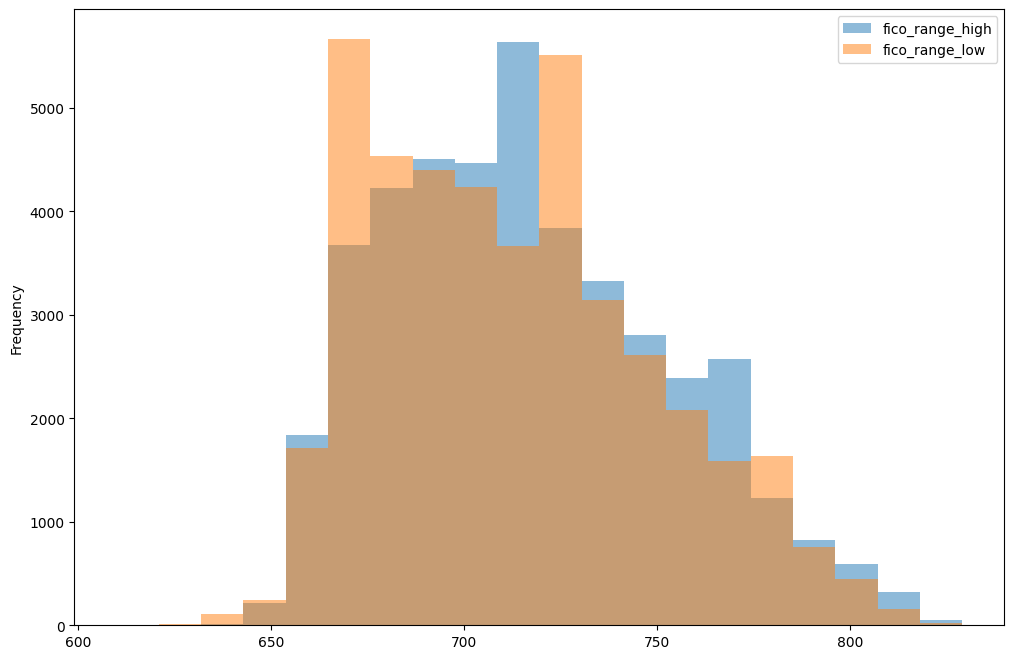

In [ ]:
fico_columns = ['fico_range_high','fico_range_low']
print(loans_2007.shape[0])
loans_2007.dropna(subset=fico_columns, inplace=True)
print(loans_2007.shape[0])
loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20);

Ahora sigamos adelante y creemos una columna para el promedio de las columnas `fico_range_low` y `fico_range_high` y asígnele el nombre `fico_average`. Tenga en cuenta que este no es el puntaje FICO promedio para cada prestatario, sino más bien un promedio del rango alto y bajo en el que sabemos que se encuentra el prestatario.

In [ ]:
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low']) / 2

In [ ]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


¡Bien! Conseguimos los cálculos medios y todo bien. Ahora, podemos continuar y eliminar las columnas `fico_range_low`, `fico_range_high`, `last_fico_range_low` y `last_fico_range_high`.

In [ ]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.shape

(42538, 33)

Observe que con solo familiarizarnos con las columnas del conjunto de datos, hemos podido reducir la cantidad de columnas de 56 a 33 sin perder ningún dato significativo para nuestro modelo. También hemos evitado problemas al eliminar datos que filtran información del futuro, lo que habría estropeado los resultados de nuestro modelo. ¡Por eso la limpieza de datos es tan importante!
Decidir sobre una columna de destino

Ahora, decidiremos la columna adecuada para usar como columna de destino para el modelado.

Nuestro __principal objetivo es predecir quién pagará un préstamo y quién no__, necesitamos encontrar una columna que refleje esto. A partir de la descripción de las columnas en el DataFrame de vista previa, aprendimos que `loans_status` es el único campo del conjunto de datos principal que describe el estado de un préstamo, así que usemos esta columna como la columna de destino.

In [ ]:
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


Actualmente, esta columna contiene valores de texto que deben convertirse a valores numéricos para poder usarlos para entrenar un modelo. Exploremos los diferentes valores en esta columna y desarrollemos una estrategia para convertirlos. Usaremos el método de DataFrame `value_counts()` para devolver la frecuencia de los valores únicos en la columna de estado de préstamo.

In [ ]:
loans_2007["loan_status"].value_counts()

loan_status
Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: count, dtype: int64

¡El estado del préstamo tiene nueve valores posibles diferentes! Aprendamos sobre estos valores únicos para determinar los que mejor describen el resultado final de un préstamo y también el tipo de problema de clasificación con el que nos ocuparemos.

Podemos leer sobre la mayoría de los diferentes estados de los préstamos en el sitio web de LendingClub, así como estas publicaciones en los foros de [Lend Academy](https://www.lendacademy.com/)  y [Orchard](https://orchardfunding.com/).

A continuación, reuniremos esos datos en una tabla para que podamos ver los valores únicos, su frecuencia en el conjunto de datos y tener una idea más clara de lo que significa cada uno:

In [ ]:
meaning = [
"Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is up to date on current payments.",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

ValueError: All arrays must be of the same length

Recuerde, nuestro objetivo es crear un modelo de aprendizaje automático que pueda aprender de préstamos anteriores para tratar de predecir qué préstamos se pagarán y cuáles no. De la tabla anterior, solo los valores Totalmente pagado (`Fully Paid`) y Cancelado (`Charged Off`) describen el resultado final de un préstamo. Los otros valores describen préstamos que aún están en curso, y aunque algunos préstamos se retrasan en los pagos, no podemos saltar el arma y clasificarlos como cancelados.

Además, mientras que el estado predeterminado se asemeja al estado de anulado, a los ojos de LendingClub, los préstamos que se cancelan esencialmente no tienen ninguna posibilidad de ser reembolsados, mientras que los préstamos en mora tienen una pequeña posibilidad. Por lo tanto, debemos utilizar solo muestras en las que la columna de estado de préstamo sea Totalmente pagado (`Fully Paid`) y Cancelado (`Charged Off`).

No nos interesa ningún estado que indique que el préstamo está en curso, porque predecir que algo está en curso no nos dice nada.

Estamos interesados ​​en poder predecir a cuál de Totalmente pagado (`Fully Paid`) y PagCanceladoado (`Charged Off`) se incluirá un préstamo, de modo que podamos tratar el problema como una clasificación binaria. Eliminemos todos los préstamos que no contienen 'Totalmente pagado' o 'Cancelado' como estado del préstamo y luego transformemos los valores de 'Totalmente pagado' a 1 para el caso positivo y los valores de 'Cancelado' a 0 para el caso negativo.

Esto significará que de las ~ 42,000 filas que tenemos, eliminaremos un poco más de 3,000.

Hay algunas formas diferentes de transformar todos los valores en una columna, usaremos el método `replace()` de DataFrame.

In [ ]:
loans_2007 = loans_2007[(loans_2007["loan_status"] == "Fully Paid") |
                        (loans_2007["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans_2007 = loans_2007.replace(mapping_dictionary)
print(loans_2007)

Empty DataFrame
Columns: [loan_amnt, term, installment, grade, emp_length, home_ownership, annual_inc, verification_status, loan_status, pymnt_plan, purpose, title, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens, fico_average]
Index: []


In [ ]:
loans_2007.shape

(39239, 33)

Eliminar columnas con un solo valor

Para concluir esta sección, busquemos las columnas que contengan solo un valor único y elimínelas. Estas columnas no serán útiles para el modelo ya que no agregan ninguna información a cada solicitud de préstamo. Además, eliminar estas columnas reducirá la cantidad de columnas que necesitaremos explorar más en la siguiente etapa.

El método pandas Series `nunique()` devuelve el número de valores únicos, excluyendo cualquier valor nulo. Podemos aplicar este método en todo el conjunto de datos para eliminar estas columnas en un solo paso.

In [ ]:
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]

Nuevamente, puede haber algunas columnas con más de un valor único, pero un valor que tiene una frecuencia insignificante en el conjunto de datos. Busquemos y descartemos las columnas con valores únicos que aparecen menos de cuatro veces:

In [ ]:
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())
        print()

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, d

La columna del plan de pago (`pymnt_plan`) tiene dos valores únicos, `y` y `n`, e `y` aparece solo una vez. Eliminemos esta columna:

In [ ]:
print(loans_2007.shape[1])
loans_2007 = loans_2007.drop('pymnt_plan', axis=1)
print(f"Hemos reducido los atributos (features) a: {loans_2007.shape[1]}")

33
Hemos reducido los atributos (features) a: 32


Por último, usemos pandas para guardar nuestro DataFrame recién limpiado como un archivo CSV:

In [ ]:
loans_2007.to_csv("/content/drive/MyDrive/Magister/Ciencia de Datos/CienciadeDatos/data/filtered_loans_2007.csv", index=False)

## <font color='blue'>**Paso 3: Preparar las funciones para el aprendizaje automático**</font>

En esta sección, prepararemos los datos `filtered_loans_2007.csv` para el aprendizaje automático. Nos centraremos en gestionar los valores perdidos, convertir columnas categóricas en columnas numéricas y eliminar cualquier otra columna superflua.

Necesitamos manejar los valores perdidos  (`missing values`) y las características categóricas antes de introducir los datos en un algoritmo de aprendizaje automático, porque las matemáticas subyacentes a la mayoría de los modelos de aprendizaje automático asumen que los datos son numéricos y no contienen valores perdidos. Para reforzar este requisito, scikit-learn devolverá un error si intenta entrenar un modelo usando datos que contienen valores faltantes o valores no numéricos cuando se trabaja con modelos como regresión lineal y regresión logística.

A continuación, se muestra un resumen de lo que haremos en esta etapa:

1. Manejar valores perdidos
2. Investigar columnas categóricas
3. Convertir columnas categóricas en características numéricas
4. Asignar valores ordinales a enteros
5. Codificar valores nominales como variables ficticias


Sin embargo, primero carguemos los datos del resultado final de la última sección:

In [ ]:
filtered_loans = pd.read_csv('/content/drive/MyDrive/Magister/Ciencia de Datos/CienciadeDatos/data/filtered_loans_2007.csv')
print(filtered_loans.shape)
filtered_loans.head()

(39239, 24)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,Sep-2016,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0,732.0


###__Manejar valores perdidos (missing values)__

Calculemos la cantidad de valores perdidos y determinemos cómo manejarlos. Podemos devolver el número de valores faltantes en el DataFrame de la siguiente manera:

    Primero, use el método Pandas DataFrame isnull() para devolver un DataFrame que contenga valores booleanos:
        Verdadero si el valor original es nulo
        Falso si el valor original no es nulo
    Luego, use el método sum() de Pandas DataFrame para calcular el número de valores nulos en cada columna.

In [ ]:
null_counts = filtered_loans.isnull().sum()
print("Número de valores nulos en cada columna:\n{}".format(null_counts))

Número de valores nulos en cada columna:
loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
fico_average               0
dtype: int64


Observe que mientras la mayoría de las columnas tienen 0 valores perdidos, el `title`, `revol_util` y `pub_rec_bankruptcies`, entre otros, si los tienen.

Eliminemos las columnas por completo donde más del 1% de las filas de esa columna contienen un valor nulo. Además, eliminaremos las filas restantes que contienen valores nulos. Esto significa que perderemos algunos datos, pero a cambio mantendremos algunas funciones adicionales para usar en la predicción (ya que no tendremos que quitar esas columnas).

Mantendremos las columnas `title` y `revol_util`, solo eliminaremos las filas que contienen valores faltantes, pero eliminaremos la columna `pub_rec_bankruptcies` por completo, ya que más del 1% de las filas tienen un valor perdido para esta columna.

Específicamente, esto es lo que vamos a hacer:

1. Utilice el método `drop` para eliminar la columna `pub_rec_bankruptcies` de `filtered_loans`.
2. Utilice el método `dropna` para eliminar todas las filas de los `filtered_loans` que contengan los valores faltantes.

Y así es como se ve en código.

In [ ]:
filtered_loans = filtered_loans.drop("pub_rec_bankruptcies",axis=1)
filtered_loans = filtered_loans.dropna()

Tenga en cuenta que hay una variedad de formas de lidiar con los valores perdidos, y este es uno de los pasos más importantes en la limpieza de datos para el aprendizaje automático. Estamos listos con este paso, así que pasemos a trabajar con las columnas categóricas.

###__Investigar columnas categóricas__

Nuestro objetivo aquí es terminar con un conjunto de datos que esté listo para el aprendizaje automático, lo que significa que no contiene valores faltantes y que todos los valores en las columnas son numéricos (tipo de datos flotante o int).

Ya tratamos con los valores faltantes, así que ahora averigüemos la cantidad de columnas que son del tipo de datos de objeto y averigüemos cómo podemos hacer que esos valores sean numéricos.

In [ ]:
print("Tipos de datos y su frecuencia\n{}".format(filtered_loans.dtypes.value_counts()))

Tipos de datos y su frecuencia
float64    11
object     11
int64       1
Name: count, dtype: int64


Tenemos 11 columnas de objetos que contienen texto que debe convertirse en características numéricas. Seleccionemos solo las columnas de objeto con el método de DataFrame `select_dtype`, luego visualicemos una fila de muestra para tener una mejor idea de cómo se formatean los valores en cada columna.

In [ ]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


Observe que la columna `revol_util` contiene valores numéricos, pero tiene el formato de objeto. Aprendimos de la descripción de columnas en el DataFrame de vista previa que `revol_util` es una “tasa de utilización de línea renovable o la cantidad de crédito que el prestatario está usando en relación con todo el crédito disponible”. Necesitamos formatear `revol_util` como un valor numérico. Esto es lo que podemos hacer:

    Utilice el método de cadena str.rstrip () para quitar el signo de porcentaje final derecho (%).
    En el objeto Series resultante, use el método astype () para convertir al tipo float.
    Asigne la nueva serie de valores flotantes de nuevo a la columna revol_util en los préstamos_filtrados.

In [ ]:
filtered_loans['revol_util'] = filtered_loans['revol_util'].str.rstrip('%').astype('float')

Continuando, estas columnas parecen representar valores categóricos:

    home_ownership: estado de propiedad de la vivienda, solo puede ser 1 de 4 valores categóricos según el diccionario de datos.
    verify_status: indica si LendingClub verificó los ingresos.
    emp_length: número de años que el prestatario estuvo empleado en el momento de la solicitud.
    plazo: número de pagos del préstamo, ya sea 36 o 60.
    addr_state: estado de residencia del prestatario.
    grado: grado de préstamo asignado por LC basado en el puntaje de crédito.
    propósito: una categoría proporcionada por el prestatario para la solicitud de préstamo.
    título - título del préstamo proporcionado por el prestatario.

Para estar seguro, confirmemos verificando el número de valores únicos en cada uno de ellos.

Además, según los valores de la primera fila para el propósito (`purpose`) y el título (`title`), parece que estas dos columnas reflejan la misma información. Exploraremos sus recuentos de valor único por separado para confirmar si esto es cierto.

Por último, observe que los valores de la primera fila para las columnas `earliest_cr_line` y `last_credit_pull_d` contienen valores de fecha que requerirían una buena cantidad de ingeniería de funciones para que sean potencialmente útiles:

    earliest_cr_line: el mes en que se abrió la primera línea de crédito informada por el prestatario.
    last_credit_pull_d: el mes más reciente en el que LendingClub obtuvo crédito para este préstamo.

Para algunos análisis, podría valer la pena realizar esta ingeniería de funciones, pero para los fines de este tutorial, simplemente eliminaremos estas columnas de fecha del DataFrame.

Primero, exploremos los recuentos de valores únicos de las seis columnas que parecen contener valores categóricos:

In [ ]:
cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
home_ownership
RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: count, dtype: int64 

grade :
grade
B    11545
A     9675
C     7801
D     5086
E     2715
F      993
G      308
Name: count, dtype: int64 

verification_status :
verification_status
Not Verified       16391
Verified           12070
Source Verified     9662
Name: count, dtype: int64 

emp_length :
emp_length
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: count, dtype: int64 

term :
term
 36 months    28234
 60 months     9889
Name: count, dtype: int64 

addr_state :
addr_state
CA    6833
NY    3657
FL    2741
TX    2639
NJ    1802
IL    1476
PA    1460
VA    1359
GA    1340
MA    1292
OH    1167
MD    1020
AZ     819
WA     796
CO     755
NC     747
CT     719
MI     684
MO     653
MN     586
NV     473
S

La mayoría de estas columnas contienen valores categóricos discretos que podemos codificar como variables ficticias y conservar. Sin embargo, la columna `addr_state` contiene demasiados valores únicos, por lo que es mejor eliminar esto.

A continuación, veamos los recuentos de valores únicos para las columnas de propósito y título para comprender qué columnas queremos mantener.

In [ ]:
for name in ['purpose','title']:
    print("Valores únicos en la columna: {}\n".format(name))
    print(filtered_loans[name].value_counts(),'\n')

Valores únicos en la columna: purpose

purpose
debt_consolidation    17965
credit_card            4944
other                  3764
home_improvement       2852
major_purchase         2105
small_business         1749
car                    1483
wedding                 927
medical                 663
moving                  556
house                   359
vacation                349
educational             312
renewable_energy         95
Name: count, dtype: int64 

Valores únicos en la columna: title

title
Debt Consolidation            2102
Debt Consolidation Loan       1635
Personal Loan                  632
Consolidation                  495
debt consolidation             476
                              ... 
Feb Loan                         1
Tictok24                         1
Wedding/Honeymoon Expenses       1
Veterinary Expense               1
JAL Loan                         1
Name: count, Length: 19021, dtype: int64 



Parece que las columnas de `purpose` y `title` contienen información superpuesta, pero la columna de propósito (`purpose`) contiene menos valores discretos y es más limpia, por lo que la conservaremos y eliminaremos el título (`title`).

Dejemos las columnas que hemos decidido no mantener hasta ahora:

In [ ]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)

Convertir columnas categóricas en características numéricas

Primero, comprendamos los dos tipos de características categóricas que tenemos en nuestro conjunto de datos y cómo podemos convertir cada una en características numéricas:

- __Valores ordinales__: estos valores categóricos están en orden natural. Podemos ordenarlos en orden creciente o decreciente. Por ejemplo, aprendimos anteriormente que LendingClub califica a los solicitantes de préstamos de A a G, y asigna a cada solicitante una tasa de interés correspondiente: el grado A es menos riesgoso, el grado B es más riesgoso que A, y así sucesivamente:
<br><br>
$$
A \lt B \lt C \lt D \lt E \lt F \lt G \quad \mbox{donde < significa menos riesgoso que...}$$
<br>
- __Valores nominales__: son valores categóricos regulares. No puede pedir valores nominales. Por ejemplo, aunque podemos ordenar a los solicitantes de préstamos en la columna de duración del empleo (`emp_length`) en función de los años pasados ​​en la fuerza laboral:
<br>
$$
\mbox{año 1} \lt \mbox{año 2} \lt \mbox{año 3} \dots \lt \mbox{año N},
$$
<br>
no podemos hacer eso con el propósito de la columna. No tendría sentido decir:
<br><br>
$$
\mbox{coche} \lt \mbox{boda} \lt \mbox{educación} \lt \mbox{mudanza} \lt \mbox{casa}
$$
<br>
Estas son las columnas que ahora tenemos en nuestro conjunto de datos:
<br>


    Valores ordinales
        grado
        emp_length

    Valores nominales _ propiedad_de_ vivienda
        Estado de verificación
        propósito
        término

Existen diferentes enfoques para manejar cada uno de estos dos tipos. Para __asignar los valores ordinales a enteros__, podemos usar el método `replace()` de Pandas DataFrame para asignar tanto `grade` como `emp_length` a los valores numéricos apropiados:

In [ ]:
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}
filtered_loans = filtered_loans.replace(mapping_dict)
filtered_loans[['emp_length','grade']].head()

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,3,1


¡Perfecto! Pasemos a los __valores nominales__. La conversión de características nominales en características numéricas requiere codificarlas como variables ficticias. El proceso será:

1. Utilice el método `get_dummies()` de pandas para devolver un nuevo DataFrame que contenga una nueva columna para cada variable ficticia.
2. Utilice el método `concat()` para agregar estas columnas ficticias al DataFrame original.
3. Elimine las columnas originales por completo utilizando el método de eliminación.

Sigamos adelante y codifiquemos las columnas nominales que tenemos en nuestro conjunto de datos:

In [ ]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])
filtered_loans = pd.concat([filtered_loans, dummy_df], axis=1)
filtered_loans = filtered_loans.drop(nominal_columns, axis=1)

In [ ]:
filtered_loans.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


Para resumir, inspeccionemos nuestro resultado final de esta sección para asegurarnos de que todas las características tengan la misma longitud, no contengan ningún valor nulo y sean numéricas. Usaremos el método de `info()` de pandas para inspeccionar el DataFrame de `filter_loans`:

In [ ]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38123 entries, 0 to 39238
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38123 non-null  float64
 1   installment                          38123 non-null  float64
 2   grade                                38123 non-null  int64  
 3   emp_length                           38123 non-null  int64  
 4   annual_inc                           38123 non-null  float64
 5   loan_status                          38123 non-null  int64  
 6   dti                                  38123 non-null  float64
 7   delinq_2yrs                          38123 non-null  float64
 8   inq_last_6mths                       38123 non-null  float64
 9   open_acc                             38123 non-null  float64
 10  pub_rec                              38123 non-null  float64
 11  revol_bal                        

¡Todo eso se ve bien! Felicitaciones, acabamos de limpiar un gran conjunto de datos para el aprendizaje automático y agregamos algunas habilidades valiosas de limpieza de datos a nuestro repertorio en el proceso.

¡Sin embargo, todavía hay una tarea final importante que debemos completar!
Guardar en CSV u en otro formato binario si el archivo es muy grande.

Es una buena práctica almacenar el resultado final de cada sección o etapa de su flujo de trabajo en un archivo separado. Uno de los beneficios de esta práctica es que nos ayuda a realizar cambios en nuestro flujo de procesamiento de datos sin tener que recalcular todo.

Como hicimos anteriormente, podemos almacenar nuestro DataFrame como un CSV usando la práctica función pandas `to_csv()`.

In [ ]:
filtered_loans.to_csv("/content/drive/MyDrive/Magister/Ciencia de Datos/CienciadeDatos/data/cleaned_loans_2007.csv",index=False)

In [ ]:
filtered_loans

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39234,2500.0,78.42,1,4,110000.0,1,11.33,0.0,0.0,13.0,0.0,7274.0,13.1,40.0,762.0,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
39235,8500.0,275.38,3,3,18000.0,1,6.40,1.0,1.0,6.0,0.0,8847.0,26.9,9.0,692.0,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
39236,5000.0,156.84,1,0,100000.0,1,2.30,0.0,0.0,11.0,0.0,9698.0,19.4,20.0,742.0,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
39237,5000.0,155.38,1,0,200000.0,1,3.72,0.0,0.0,17.0,0.0,85607.0,0.7,26.0,812.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


## <font color='blue'>**Particionar en Entrenamiento y Test**</font>

In [ ]:
columns = filtered_loans.columns

In [ ]:
X = filtered_loans.drop('loan_status',axis=1)

In [ ]:
y = filtered_loans['loan_status']

In [ ]:
y

0        1
1        0
2        1
3        1
4        1
        ..
39234    1
39235    1
39236    1
39237    1
39238    1
Name: loan_status, Length: 38123, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(22873, 38)
(15250, 38)


In [ ]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(22873,)
(15250,)


## <font color='blue'>**5-fold Cross-validation**</font>

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
for k, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Felicitaciones! Ha terminado el trabajo con el conjunto de datos.

## <font color='green'>Actividad 1</font>

Limpiar y preprocesar el siguiente conjunto de datos:

```
import pandas as pd
students = pd.read_csv('StudentsPerformance.csv')
```



Separe el conjunto de datos en *X* e *y*. El vector *y* son las columnas `math score`, `reading score` y `writing score`. Genere 3 escenarios distintos en donde *y* sea una de las 3 columnas finales.

<font color='green'>Fin Actividad 1</font>

In [ ]:
# Scenario 1 - Gender vs math score

import pandas as pd
#Importar informacion
students = pd.read_csv('/content/drive/MyDrive/Magister/Ciencia de Datos/CienciadeDatos/data/StudentsPerformance.csv')

students = students.drop(columns=['lunch', 'test preparation course', 'race/ethnicity', 'reading score', 'writing score'])



count             1000
unique               6
top       some college
freq               226
Name: parental level of education, dtype: object

In [ ]:
students['gender'].describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

In [ ]:
students['parental level of education'].describe()

count             1000
unique               6
top       some college
freq               226
Name: parental level of education, dtype: object

In [ ]:
students['gender'].describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object